In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras import regularizers
scaler = StandardScaler()

In [11]:
df = pd.read_csv("DATASET-balanced-binarized.csv")

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [12]:
df.head()

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,LABEL
0,0.338055,0.027948,2842.948867,4322.916759,6570.586186,0.041050,-462.169586,90.311272,19.073769,24.046888,...,-6.686564,0.902086,-7.251551,-1.198342,4.747403,-4.986279,0.953935,-5.013138,-6.779060,0
1,0.443766,0.037838,2336.129597,3445.777044,3764.949874,0.047730,-409.413422,120.348808,-7.161531,5.114784,...,-2.131157,-6.876417,-1.359395,0.326401,-5.420016,-2.109968,-1.757634,-9.537907,-8.494421,0
2,0.302528,0.056578,2692.988386,2861.133180,4716.610271,0.080342,-318.996033,120.490273,-24.625771,23.891073,...,-5.853725,-3.724773,-6.627182,-5.117002,-6.072106,-0.994653,-1.617120,-3.922354,-7.033001,0
3,0.319933,0.031504,2241.665382,3503.766175,3798.641521,0.047180,-404.636749,136.320908,2.308172,-3.907071,...,-1.898315,-2.046493,-7.176277,-3.293508,4.209121,0.121835,-5.407063,-3.654926,-3.274857,0
4,0.420055,0.016158,2526.069123,3102.659519,5025.077899,0.051905,-410.497925,152.731400,-18.266771,51.993462,...,-1.952340,0.810868,6.238493,6.555839,7.535542,2.849219,2.616843,-1.793357,-5.060998,0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\Niko\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6058 - loss: 43.0159 - val_accuracy: 0.6027 - val_loss: 4.7565
Epoch 2/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.7327 - loss: 4.1025 - val_accuracy: 0.7445 - val_loss: 2.0870
Epoch 3/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.7330 - loss: 3.8308 - val_accuracy: 0.8251 - val_loss: 1.3046
Epoch 4/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.7920 - loss: 2.2469 - val_accuracy: 0.6897 - val_loss: 4.5505
Epoch 5/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.7912 - loss: 2.4500 - val_accuracy: 0.6617 - val_loss: 5.1144
Epoch 6/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8170 - loss: 2.0458 - val_accuracy: 0.7678 - val_loss: 3.1696
Epoch 7/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.7918 - loss: 3.2621 - val_accuracy: 0.8663 - val_loss: 0.9411
Epoch 8/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8243 - loss: 1.8403

In [17]:
accuracy = model.evaluate(X_test, y_test, verbose=1)

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.9774 - loss: 0.0767


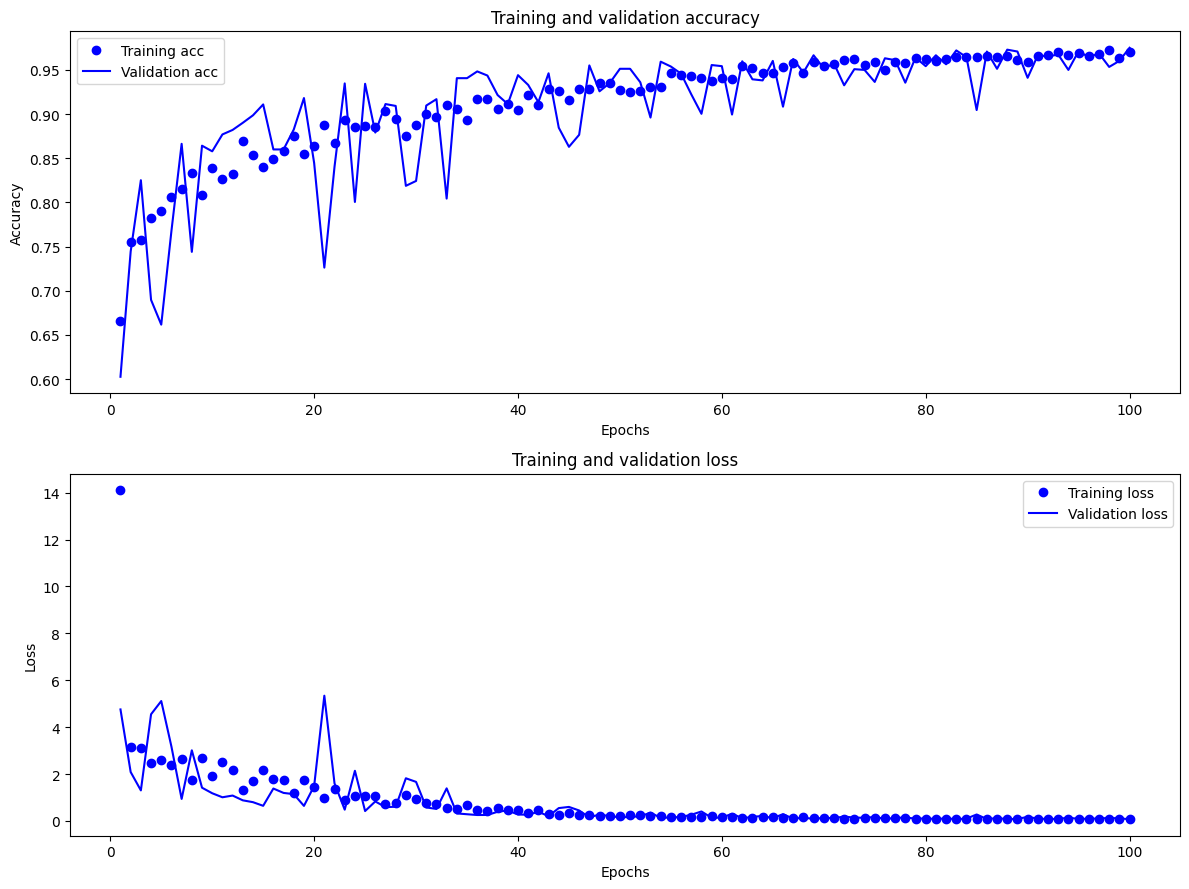

In [18]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 9))

plt.subplot(2, 1, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
model.save("test.h5")